## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

## Read in Data

In [2]:
shelter = pd.read_csv('../../Final-Project/Data/shelter.csv')
pd.set_option('display.max_columns', None)
shelter.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013


## Goal: Predict Adoptions for Cats Only
### Data Wrangling
#### Check all age groups

In [3]:
shelter.CatAgeGroup.value_counts()

Adult         8210
Adolescent    6388
Mature        1405
Kitten        1077
Senior         760
Geriatric      224
Name: CatAgeGroup, dtype: int64

In [4]:
# Recode movement months to full month name
def movementMonth (series):
    if series == 1:
        return "January"
    if series == 2:
        return "February"
    if series == 3:
        return "March"
    if series == 4:
        return "April"
    if series == 5:
        return "May"
    if series == 6:
        return "June"
    if series == 7:
        return "July"
    if series == 8:
        return "August"
    if series == 9:
        return "September"
    if series == 10:
        return "October"
    if series == 11:
        return "November"
    if series == 12:
        return "December"
shelter['Month'] = shelter['movementMonth'].apply(movementMonth)

In [5]:
# Recode sex
def sexname (series):
    if series == "Female":
        return "0"
    if series == "Male":
        return "1"
shelter['sexnameR'] = shelter['sexname'].apply(sexname)

In [6]:
# Recode adopted or not
def movementtype (series):
    if series == "Adoption":
        return 1
    else:
        return 0
shelter['movementtypeR'] = shelter['movementtype'].apply(movementtype)

In [7]:
shelter.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear,Month,sexnameR,movementtypeR
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009,May,0,1
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009,April,1,1
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012,April,0,1
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012,February,0,0
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013,April,0,0


In [8]:
# Recode months into columns
dummy_months = pd.get_dummies(shelter['Month'])
dummy_months

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18059,0,0,0,0,1,0,0,0,0,0,0,0
18060,0,0,0,0,1,0,0,0,0,0,0,0
18061,0,0,0,0,1,0,0,0,0,0,0,0
18062,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
# Recode cat age groups into columns
dummy_catAges = pd.get_dummies(shelter['CatAgeGroup'])
dummy_catAges

,Adolescent,Adult,Geriatric,Kitten,Mature,Senior
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
18059,0,0,1,0,0,0
18060,0,0,1,0,0,0
18061,0,0,1,0,0,0
18062,0,1,0,0,0,0


In [10]:
# Combine recoded values with original data
shelter1 = pd.concat([shelter, dummy_months, dummy_catAges], axis = 1)

In [11]:
shelter1.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear,Month,sexnameR,movementtypeR,April,August,December,February,January,July,June,March,May,November,October,September,Adolescent,Adult,Geriatric,Kitten,Mature,Senior
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009,May,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009,April,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012,April,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012,February,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013,April,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
# Create cats only data frame
Cat = shelter1[shelter1.speciesname == 'Cat']
Cat.head()

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear,Month,sexnameR,movementtypeR,April,August,December,February,January,July,June,March,May,November,October,September,Adolescent,Adult,Geriatric,Kitten,Mature,Senior
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009,May,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013,April,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,30812,Abandoned,Domestic Short Hair,Cat,Female,Adoption,01/11/2013,05/29/2018,Mature,Senior,5,29,2018,1,11,2013,May,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
11,46437,Abandoned,Domestic Long Hair,Cat,Female,Foster,10/26/2016,03/25/2017,Senior,Geriatric,3,25,2017,10,26,2016,March,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12,46437,Abandoned,Domestic Long Hair,Cat,Female,Adoption,10/26/2016,04/07/2017,Senior,Geriatric,4,7,2017,10,26,2016,April,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
# Check number of rows and columns
Cat.shape

(11455, 37)

In [14]:
# Define target
y = Cat['movementtypeR']

In [15]:
# Define predictors
x = Cat.drop(columns=['id', 'intakereason', 'breedname', 'speciesname', 'sexname', 'movementtype', 'intakeDate', 
                      'movementDate', 'CatAgeGroup', 'DogAgeGroup', 'movementMonth', 'movementDay', 'movementYear', 
                      'intakeMonth', 'intakeDay','intakeYear', 'Month', 'movementtypeR'])

In [16]:
x.columns = x.columns.astype(str)

In [17]:
x.head()

,sexnameR,April,August,December,February,January,July,June,March,May,November,October,September,Adolescent,Adult,Geriatric,Kitten,Mature,Senior
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
# Train test split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Decision Tree

In [19]:
# Create intial decision tree
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [20]:
# Make predictions
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test,treePredictions))
print(classification_report (y_test,treePredictions))

[[ 423  972]
 [ 292 1750]]
              precision    recall  f1-score   support

           0       0.59      0.30      0.40      1395
           1       0.64      0.86      0.73      2042

    accuracy                           0.63      3437
   macro avg       0.62      0.58      0.57      3437
weighted avg       0.62      0.63      0.60      3437



## 62% weighted avg with a decision tree

## Initial Random Forest Model

In [21]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [22]:
# Evaluate Model Fit
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 419  976]
 [ 289 1753]]
              precision    recall  f1-score   support

           0       0.59      0.30      0.40      1395
           1       0.64      0.86      0.73      2042

    accuracy                           0.63      3437
   macro avg       0.62      0.58      0.57      3437
weighted avg       0.62      0.63      0.60      3437



## 62% weighted avg - same as decision tree

## Hyperparameter Tuning

In [23]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.6214722141402386
4 : 0.6205993599068955
5 : 0.6296188536514402
8 : 0.6284550480069828
10 : 0.6281640965958685
20 : 0.6322374163514694
50 : 0.6249636310736107
75 : 0.6246726796624964
100 : 0.631073610707012
250 : 0.631946464940355
500 : 0.631946464940355


## 20 trees had the best accuracy

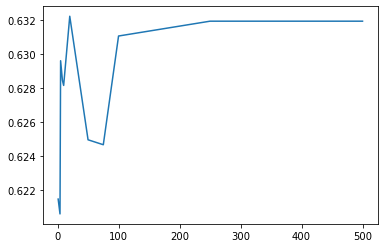

In [24]:
plt.plot(n_estimators_array, results)

## Tuning the Remaining Three Parameters

In [25]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [26]:
# Initialize one random forest for every hyperparameter
rf = RandomForestClassifier(n_estimators=20)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [44]:
# Run all fits
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=20),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [45]:
# Find best fit
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}

In [46]:
# Use best fit
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=4, max_features=None, max_depth=10)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=4,
                       n_estimators=20)

In [47]:
# Run forest predictions
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 404  991]
 [ 270 1772]]
              precision    recall  f1-score   support

           0       0.60      0.29      0.39      1395
           1       0.64      0.87      0.74      2042

    accuracy                           0.63      3437
   macro avg       0.62      0.58      0.56      3437
weighted avg       0.62      0.63      0.60      3437



### Overall weighted avg is the same.

## Feature Importance

In [48]:
# How important each of the feature is as a predictor
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

May           0.156488
Kitten        0.130812
July          0.098573
December      0.080296
June          0.078458
sexnameR      0.059332
January       0.058374
April         0.056248
Adult         0.052453
Adolescent    0.052336
Geriatric     0.038211
Mature        0.033588
November      0.032031
Senior        0.017864
August        0.017277
February      0.013862
September     0.011305
October       0.010452
March         0.002043
dtype: float64


<AxesSubplot:>

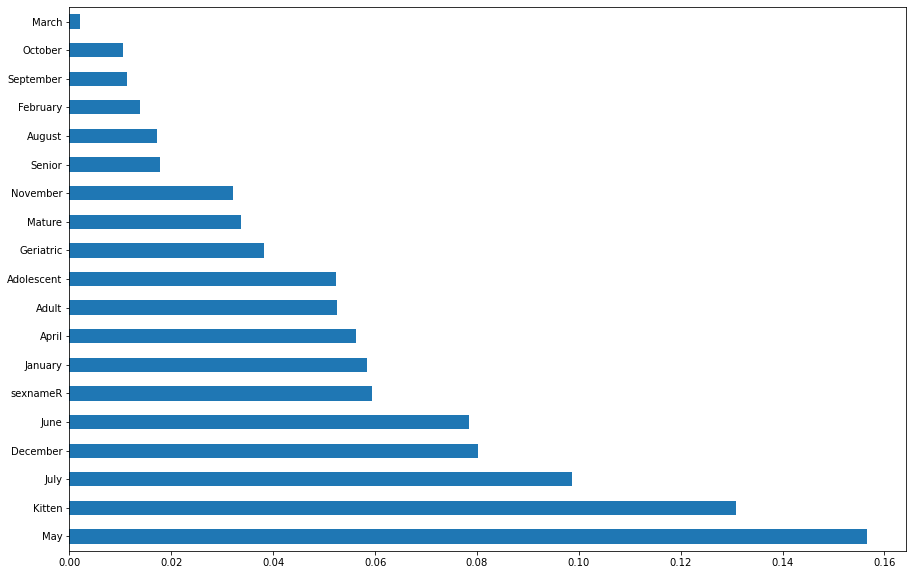

In [49]:
feature_importances.plot(kind='barh', figsize=(15,10))

## The month of May (5) and the Kitten age group are top features that influenced predictions.